__Cuaderno de trabajo de:__ Melvin Guaygua Huallpa

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math 

%matplotlib inline
import hashlib


### Números pseudo-aleatorios

Cualquier lenguaje de programación tiene una función random, que cuando la llamamos nos devuelve un número pseudo-aleatorio entre 0 y 1. Todos los números entre 0 y 1 son *"igualmente probables"

In [2]:
random.random?

In [14]:
#Cada vez que ejecutamos este código obtenemos un número distinto:
random.random()

a = random.random() #Asi se generan numeros aleatorios
b = random.random()
c = random.random()
print(a)
print(b)
print(c)

0.23245832946791867
0.6280760963620088
0.9168004119861474


In [10]:
#Generamos 10 números pseudo-aleatorios y los imprimimos
for i in range(10):
    print(random.random())

0.4936648630133026
0.5256162695495571
0.7315822619050951
0.2108044478170843
0.571213325279096
0.23656589711276366
0.9318277719522196
0.8552346820552366
0.8254753528818409
0.9467910340118555


Además, python nos ofrece otras funciones prácticas:

 - ``random.randint(a,b)`` devuelve un número entero entre a y b (inclusive). Todos los números entre a y b son *"igualmente probables"*.
 - ``random.choice(lista)`` devuelve un elemento de ``lista`` (que debe ser una lista, cadena de caracteres, conjunto...). Todos los elementos son *"igualmente probables"*.

In [53]:
for i in range(10):
    print (random.randint(10,20))

13
16
13
18
19
12
12
15
12
10


In [6]:
for i in range(10):
    print(random.choice('AEIOU')) #aqui le puedo pasar listas en vez de AEIOU

O
A
E
O
U
I
I
U
U
O


### Semilla aleatoria

Estos números parecen aleatorios, pero **el ordenador los obtiene aplicando reglas deterministas**. Sólo parecen aleatorios, pero *la cpu no lanza dados cuando llamamos a random*.

Esto no es un inconveniente en la práctica, porque son casi imposibles de distinguir de números auténticamente aleatorios.
De hecho, es una virtud, porque si fijamos la **semilla aleatoria**, podemos obtener exactmente los mismos números, aunque hagamos el cálculo en máquinas distintas varios años después.

In [77]:
#Si cambias la semilla, las elecciones cambian, pero con la misma semilla
#obtenemos los mismos resultados
random.seed(1)
for i in range(10):
    print (random.random())
# for i in range(10):
#     print (random.randint(10,20))
# for i in range(10):
#     print(random.choice('AEIOU'))
# for i in range(10):
#     print(random.choice(["hola","adiós","¿Qué tal?", "ahora vengo"]))

0.13436424411240122
0.8474337369372327
0.763774618976614
0.2550690257394217
0.49543508709194095
0.4494910647887381
0.651592972722763
0.7887233511355132
0.0938595867742349
0.02834747652200631


### Distribuciones de números aleatorios

El bloque de funciones de distribuciones ofrece numerosas funciones que permiten generar un array de números aleatorios a partir de distribuciones de todo tipo, vamos algunos ejemplos:

#### Distribución uniforme

[3.59488568 2.61984801 1.66437786 ... 8.79629878 2.09289631 0.4641615 ]


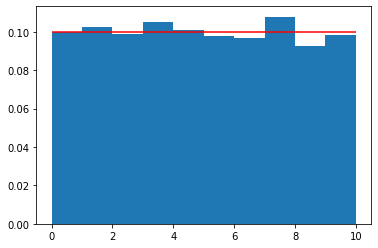

In [3]:
N_puntos = 10000
ini = 0
fin = 10
bins = 10

x = np.random.uniform(ini, fin, N_puntos)

print(x)
plt.hist(x, bins,density=True)  #desity=True integra la curva a 1
plt.hlines(1/10, ini, fin, linestyles ="-", colors ="r")
plt.show() 

#### Distribución normal

Es una distribución gausiana
$$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$$

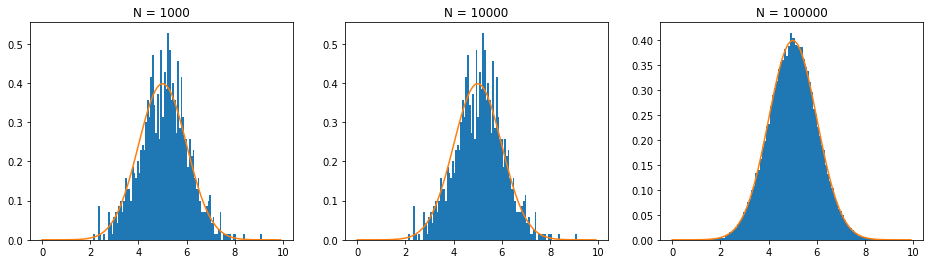

In [81]:
ini = 0
fin = 10
bins = 100
sigma = 1.0
mu = 5.0


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.normal(mu, sigma, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
# x = np.random.normal(mu, sigma, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.normal(mu, sigma, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/math.sqrt(2*math.pi*sigma**2)*math.exp(-((x[i]-mu)**2)/(2*sigma**2)))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

#### Distribución exponencial (esto lo ha puesto xq sale en la naturaleza, pero no lo usaremos creo)

Es una distribución exponencial
$$  f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta})  $$

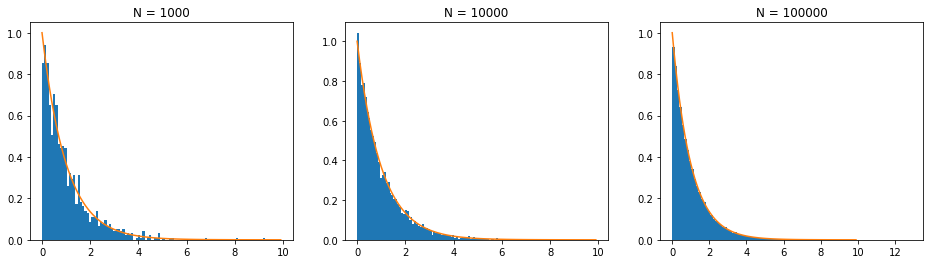

In [10]:
ini = 0
fin = 10
bins = 100
beta = 1.0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))

N_puntos = 1000
x = np.random.exponential(beta, N_puntos)
ax1.hist(x, bins,density=True)
ax1.set_title("N = "+str(N_puntos))

N_puntos = 10000
x = np.random.exponential(beta, N_puntos)
ax2.hist(x, bins,density=True)
ax2.set_title("N = "+str(N_puntos))

N_puntos = 100000
x = np.random.exponential(beta, N_puntos)
ax3.hist(x, bins,density=True)
ax3.set_title("N = "+str(N_puntos))

x = np.arange(0, 10, 0.1)
y=[]
for i in range(len(x)):
    y.append(1/beta*math.exp(-x[i]/beta))
ax1.plot(x,y)
ax2.plot(x,y)
ax3.plot(x,y)

plt.show() 

<hr>
<b><font color='red'>Ejercicio 01</font></b> 

Vamos a calcular el valor de $\pi$, para ello, si $X$ e $Y$ son dos variables aleatorias continuas uniformes en el intervalo (-1,1) y son independientes.  
$\pi$ Vendrá dada por la probabilidad de que $X^2 + Y^2  \leq 1$, es decir:  
$$\pi = \frac{4*\text{nº puntos que caén dentro}}{\text{nº total de intentos}}$$ 
Obten tambien una gráfica como la que se muestra a continuación.

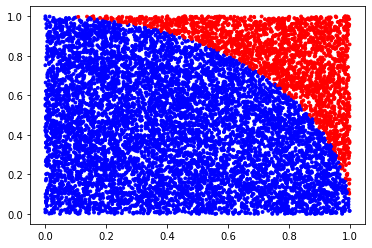

rojo 2167
azul 7833
numero pi: 3.1332


In [88]:
#gráfico de burbujas o grafico de bolas
def fun(i,j):
    if (a**2+b**2) <=1:
        return "blue"
    else:
        return "red"

x=[]
y=[]
z=[]
N=10000 #cuanto mayor sea este nuemro, mas puntos me pintara

contadorRojo=0
contadorAzul=0
for i in range(0,N): 
    # genero 2 numeros aleatorios
    a = random.random()
    b = random.random()
    # los añado a sus respectivos arrays
    x.append(a)
    y.append(b)
    # esta funcion me devuelve el nombre de un color "red"o "blue"
    colorPintar = fun(a,b)
    if colorPintar=="red":
        contadorRojo+=1
    else:
        contadorAzul+=1
    z.append(colorPintar)
            
plt.scatter(x, y, c=z, cmap='viridis',s=8) #s es el size del puntito
plt.show()

print("rojo",contadorRojo)
print("azul",contadorAzul)

#AZUL=DENTRO
#ROJO=FUERA

dentro=contadorAzul
fuera=contadorRojo

numeroPi = 4*dentro/(dentro+fuera)
print("numero pi:", numeroPi)


<img src="f6.png">  

<hr>
<b><font color='red'>Ejercicio 02</font></b> 

Crea un histograma en que se vea la distribución que saldría al sumar dos dados, tiene que verse una gráfica como la que se muestra a continuación

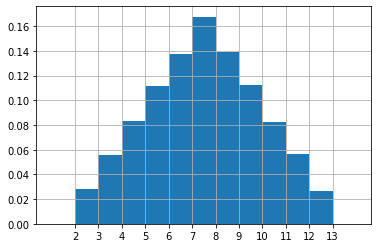

In [93]:

N =100000
dados1=[]
for i in range(N):
    dados1.append(random.randint(1,6)) # sacar numeros del 1 al 6

dados2=[]
for i in range(N):
    dados2.append(random.randint(1,6)) # sacar numeros del 1 al 6

resul=[]
for i in range(N):
    resul.append(dados1[i]+dados2[i])

lista=[]
for i in range(0,14):
    lista.append(i+1)

plt.hist(resul, bins=lista, density=True) #bins es el numero de divisiones, si no lo pones nada lo divide en 10
plt.grid()

plt.xticks(np.arange(2,14,1)) # esto es para establecer valores en el eje X

plt.show()

<img src="f7.png">  

<hr>
<b><font color='red'>Ejercicio 03</font></b> 

Al implementar MD5, obtendremos como resultado, una cadena alfanumérica de 32 caracteres hexadecimales. Ocupando siempre 16 Bytes de memoria. 

El siguiente pin = '4aca32b706287f13903f08b7aab38f79', ha sido codificado con md5 "hashlib.md5(b'****')", para ello han utilizado dos carácteres en mayúsculas ('ABCDEF')  y dos números (0-9) , haz una función que obtenga el pin descodificado utilizando random.

¿Cuántos intentos ha relizado hasta que la ha descubierto?
Reliza el ejercicio varias veces y haz un histograma.



--no hashed: 1A2D
--hashed: 4aca32b706287f13903f08b7aab38f79


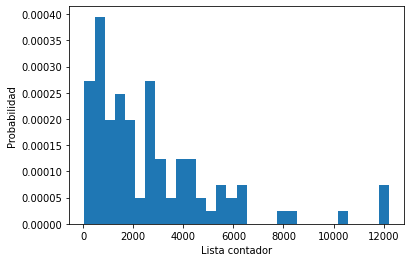

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import hashlib

import random
import math 

# -----
pin = "4aca32b706287f13903f08b7aab38f79"
list=[]
N=100

for i in range(N):  
    cont=0
    while True:
        noHashed=""
        a=random.randint(0,9)
        b=random.choice('ABCDEF')    
        c=random.randint(0,9)
        d=random.choice('ABCDEF')
        noHashed=str(a)+b+str(c)+d
        hashed = hashlib.md5(noHashed.encode('utf8')).hexdigest()
        if pin==hashed:
            break
        cont+=1
    list.append(cont)
# print(list)
print("--no hashed:",noHashed)
print("--hashed:",hashed)
# -----

x = np.array(list)
plt.hist(x,density=True, bins=30) # para los histogramas necesito un array de numpy
plt.ylabel('Probabilidad')
plt.xlabel('Lista contador');
